In [1]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline


class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate
        
        # self.w_ih = np.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
        # self.w_ho = np.random.rand(self.output_nodes, self.hidden_nodes) - 0.5
        self.w_ih = np.random.normal(0, pow(self.hidden_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.w_ho = np.random.normal(0, pow(self.output_nodes, -0.5), (self.output_nodes, self.hidden_nodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
    
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.w_ih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.w_ho, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.w_ho.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.w_ho += self.learning_rate * numpy.dot(
            (output_errors * final_outputs * (1.0 - final_outputs)),
            numpy.transpose(hidden_outputs)
        )
        
        # update the weights for the links between the input and hidden layers
        self.w_ih += self.learning_rate * numpy.dot(
            (hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
            numpy.transpose(inputs)
        )
    
    def query(self, inputs_list):
        # преобразование списка входных значений
        # в двухмерный массив
        inputs = np.array(inputs_list, ndmin=2).T 
        # рассчитать входящие сигналы для скрытого слоя 
        hidden_inputs = np.dot(self.w_ih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        # рассчитать входящие сигналы для выходного слоя 
        final_inputs = np.dot(self.w_ho, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя 
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [2]:
input_nodes = 28*28
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1
nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [3]:
from pathlib import Path
training_data_list = Path('mnist_train.csv').read_text().splitlines()

In [4]:
for e in range(5):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99

        nn.train(inputs, targets)

In [5]:
from pathlib import Path
test_data_list = Path('mnist_test.csv').read_text().splitlines()

7


array([[0.00468117],
       [0.01005615],
       [0.02227047],
       [0.00614555],
       [0.00107337],
       [0.00682628],
       [0.00100129],
       [0.96195026],
       [0.00334373],
       [0.00224423]])

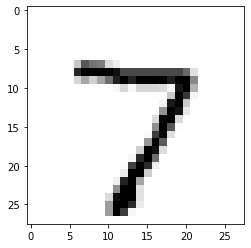

In [6]:
all_values = test_data_list[0].split(',')
print(all_values[0])
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys')
inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
nn.query(inputs)

In [7]:
answers = []
for vals in test_data_list:
    answer, *image_raw = vals.split(',')
    answer = int(answer)
    inputs = (np.asfarray(image_raw) / 255 * 0.99) + 0.01
    outputs = nn.query(inputs)
    nn_answer = outputs.argmax()
    if nn_answer == answer:
        answers.append(1)
    else:
        answers.append(0)

In [8]:
from collections import Counter
counter = Counter(answers)
print(counter[1] / (counter[0] + counter[1]))

0.9729
